In [1]:
# STEP 4: Clone and install Segment Anything
!git clone https://github.com/facebookresearch/segment-anything.git
%cd segment-anything
!pip install -e .

d:\minor2\prakriti_minor\segment-anything


fatal: destination path 'segment-anything' already exists and is not an empty directory.


Obtaining file:///D:/minor2/prakriti_minor/segment-anything
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for segment_anything (pyproject.toml): started
  Building editable for segment_anything (pyproject.toml): finished with status 'done'
  Created wheel for segment_anything: filename=segment_anything-1.0-0.editable-py3-none-any.whl size=7087 sha256=72da6dbb0fe159d286dfe1bce487c890c1f82b0061baa3bc1045921a5b4517cc
  Stored in directory: C:\Users\prakr\AppData\Local\Temp\pip-ephem-wheel-cache-1mvjdftm\wheels\18\1d\30\cd74f0c6


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth #SAM

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to c:\users\prakr\appdata\local\temp\pip-req-build-ogd_dbh6
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git 'C:\Users\prakr\AppData\Local\Temp\pip-req-build-ogd_dbh6'


In [27]:
!pip install opencv-python


  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)


In [3]:
import os

sam_checkpoint ="D:\\minor2\\prakriti_minor\\sam_vit_h_4b8939.pth"
print(os.path.exists(sam_checkpoint))  # Should return True


True


In [4]:
import torch
from segment_anything import sam_model_registry

# Define model path
sam_checkpoint = "D:\\minor2\\prakriti_minor\\sam_vit_h_4b8939.pth"

# Register and load the SAM model
sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint).to("cuda" if torch.cuda.is_available() else "cpu")
sam.eval()  # Set to evaluation mode


Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [13]:
pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 894.2 kB/s eta 0:00:09
   --- ------------------------------------ 0.8/8.1 MB 1.3 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 1.5 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 1.3 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.1 MB 1.3 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.1 MB 1.3 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.1 MB 844.5 kB/s eta 0:00:08
   ------- -------------------------------- 1.6/8.1 MB 844.5 kB/s eta 0:00:08
   ------- -------------------------------


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

# Load the SAM model
sam_checkpoint = "D:\\minor2\\prakriti_minor\\sam_vit_h_4b8939.pth"
device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint).to(device)
sam.eval()

# Load image
# Modified: Using a relative path or ensuring the image is accessible
# Check if the file exists and adjust the path accordingly
image_path = "D:\\minor2\\prakriti_minor\\0fcbdf76-fcc4-4271-986a-9466a784d404___JR_B.Spot 3374.JPG"
if not os.path.exists(image_path):
    # If not found, try a relative path (assuming the image is in the current directory)
    image_path = "D:\\minor2\\prakriti_minor\\0fcbdf76-fcc4-4271-986a-9466a784d404___JR_B.Spot 3374.JPG"

    if not os.path.exists(image_path):
      # If still not found, raise an error or handle it appropriately
      raise FileNotFoundError(f"Image file not found at: {image_path}")

image = cv2.imread(image_path)
# Check if the image was loaded successfully
if image is None:
    raise ValueError(f"Could not load image from path: {image_path}")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB update this code

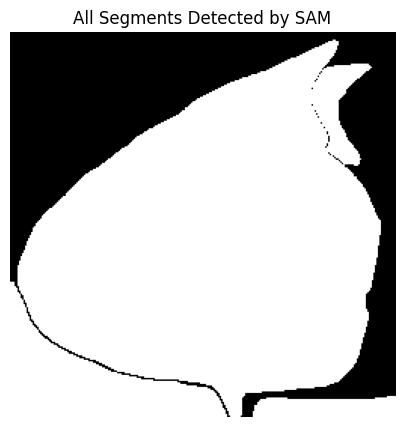

In [16]:
# Initialize the automatic mask generator
mask_generator = SamAutomaticMaskGenerator(sam)

# Generate masks for the entire image
masks = mask_generator.generate(image)

# Convert masks to NumPy array
all_masks = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

# Merge all masks into one
for mask in masks:
    all_masks[mask["segmentation"]] = 255

# Display full segmentation
plt.figure(figsize=(10, 5))
plt.imshow(all_masks, cmap="gray")
plt.axis("off")
plt.title("All Segments Detected by SAM")
plt.show()


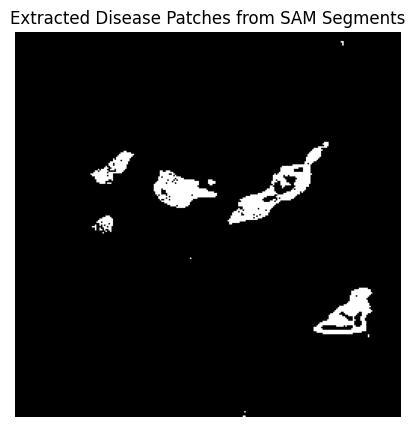

In [17]:
# Convert image to HSV for better color segmentation
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Define range for brownish/yellowish disease patches
lower = np.array([10, 50, 50])  # Adjust these values for your dataset
upper = np.array([30, 255, 255])
mask_disease = cv2.inRange(hsv, lower, upper)

# Combine with SAM's mask output
final_mask = cv2.bitwise_and(all_masks, all_masks, mask=mask_disease)

# Display filtered disease patches
plt.figure(figsize=(10, 5))
plt.imshow(final_mask, cmap="gray")
plt.axis("off")
plt.title("Extracted Disease Patches from SAM Segments")
plt.show()


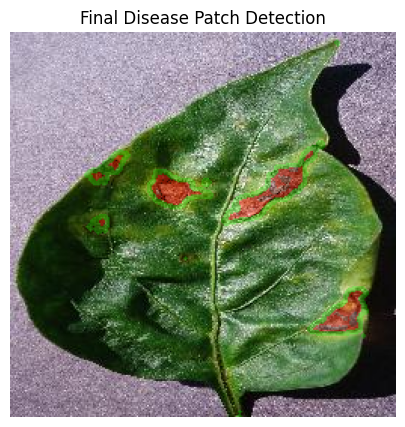

In [18]:
# Create an overlay for better visualization
overlay = image.copy()
overlay[final_mask > 0] = [255, 0, 0]  # Highlight disease patches in red

# Draw contours for precision
contours, _ = cv2.findContours(final_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(overlay, contours, -1, (0, 255, 0), 2)  # Green contours

# Blend original & overlay
output = cv2.addWeighted(image, 0.7, overlay, 0.3, 0)

# Display final result
plt.figure(figsize=(10, 5))
plt.imshow(output)
plt.axis("off")
plt.title("Final Disease Patch Detection")
plt.show()


In [9]:
plant_info = {
    "Pepper__bell___Bacterial_spot": {
        "Soil_Type": "Well-drained loamy soil (pH 6.0–6.8)",
        "Nutritional_Needs": "Balanced N-P-K like 10-10-10",
        "Fertilizer": "Compost + ammonium nitrate side-dress",
        "Water_Level": "Moderate; consistent soil moisture",
        "Pesticide": "Copper-based bactericide spray weekly",
        "Dos": [
            "Use certified disease-free seeds",
            "Apply drip irrigation",
            "Maintain proper nitrogen levels"
        ],
        "Donts": [
            "Avoid overhead watering",
            "Do not handle plants when wet"
        ]
    },
    "Pepper__bell___healthy": {
        "Soil_Type": "Well-drained loamy soil (pH 6.0–6.8)",
        "Nutritional_Needs": "Maintain balanced NPK and micronutrients",
        "Fertilizer": "Organic compost or 10-10-10 fertilizer",
        "Water_Level": "Moderate; regular watering without wetting leaves",
        "Dos": [
            "Water consistently without wetting leaves",
            "Mulch to retain soil moisture"
        ],
        "Donts": [
            "Avoid water stress",
            "Avoid wetting foliage directly"
        ]
    },
    "Potato___Early_blight": {
        "Soil_Type": "Sandy loam soil (pH 5.0–6.0)",
        "Nutritional_Needs": "High phosphorus and potassium, moderate nitrogen",
        "Fertilizer": "Apply 5-10-10 fertilizer at planting",
        "Water_Level": "Moderate; avoid excess moisture",
        "Pesticide": "Chlorothalonil fungicide at early signs",
        "Dos": [
            "Rotate crops yearly",
            "Use certified disease-free seed potatoes"
        ],
        "Donts": [
            "Avoid excess nitrogen fertilization",
            "Do not leave infected plant debris"
        ]
    },
    "Potato___Late_blight": {
        "Soil_Type": "Sandy loam soil (pH 5.0–6.0)",
        "Nutritional_Needs": "Emphasize potassium supplementation",
        "Fertilizer": "Apply potassium-rich fertilizers like muriate of potash",
        "Water_Level": "Low to moderate; avoid wet foliage",
        "Pesticide": "Mancozeb or copper fungicide sprays",
        "Dos": [
            "Spray fungicides at early signs",
            "Destroy infected plants immediately"
        ],
        "Donts": [
            "Avoid planting potatoes too densely",
            "Don't overhead irrigate during wet weather"
        ]
    },
    "Potato___healthy": {
        "Soil_Type": "Sandy loam, pH 5.0–6.0",
        "Nutritional_Needs": "Balanced 5-10-10 NPK supply with organic matter",
        "Fertilizer": "Compost + balanced fertilizer before planting",
        "Water_Level": "Moderate; ensure well-drained soil",
        "Dos": [
            "Maintain loose, well-aerated soil"
        ],
        "Donts": [
            "Avoid overwatering and waterlogging"
        ]
    },
    "Tomato_Bacterial_spot": {
        "Soil_Type": "Well-drained fertile soil (pH 6.2–6.8)",
        "Nutritional_Needs": "Balanced NPK with calcium",
        "Fertilizer": "Apply 10-10-10 pre-planting, side-dress calcium nitrate",
        "Water_Level": "Moderate; drip irrigation preferred",
        "Pesticide": "Copper-based bactericide weekly",
        "Dos": [
            "Use copper-based bactericides",
            "Grow resistant varieties if available"
        ],
        "Donts": [
            "Avoid overhead irrigation",
            "Don't compost infected plant material"
        ]
    },
    "Tomato_Early_blight": {
        "Soil_Type": "Loamy soil rich in organic matter (pH 6.2–6.8)",
        "Nutritional_Needs": "Slightly higher phosphorus and potassium",
        "Fertilizer": "Phosphorus-rich fertilizers like 10-20-10",
        "Water_Level": "Moderate; maintain soil moisture without wetting leaves",
        "Pesticide": "Chlorothalonil or copper fungicide sprays",
        "Dos": [
            "Mulch heavily to prevent soil splash",
            "Remove lower leaves showing symptoms"
        ],
        "Donts": [
            "Do not reuse stakes or cages without sterilization",
            "Avoid watering late in the day"
        ]
    },
    "Tomato_Late_blight": {
        "Soil_Type": "Loamy soil with excellent drainage (pH 6.2–6.8)",
        "Nutritional_Needs": "Potassium-heavy diet, moderate nitrogen",
        "Fertilizer": "Use 5-10-10 or potassium sulfate fertilizers",
        "Water_Level": "Moderate; dry foliage quickly after rain",
        "Pesticide": "Mancozeb or metalaxyl fungicide",
        "Dos": [
            "Apply protective fungicide sprays",
            "Remove infected leaves immediately"
        ],
        "Donts": [
            "Avoid dense planting",
            "Don't allow leaves to stay wet overnight"
        ]
    },
    "Tomato_Leaf_Mold": {
        "Soil_Type": "Well-drained soil with good air circulation (pH 6.0–6.8)",
        "Nutritional_Needs": "Moderate NPK balance with extra calcium",
        "Fertilizer": "Balanced 10-10-10 fertilizer + calcium source",
        "Water_Level": "Moderate; prevent humidity buildup",
        "Pesticide": "Fungicides like chlorothalonil or mancozeb",
        "Dos": [
            "Ensure good air movement by pruning",
            "Use resistant tomato varieties"
        ],
        "Donts": [
            "Avoid watering late evening",
            "Don't grow too close together"
        ]
    },
    "Tomato_Septoria_leaf_spot": {
        "Soil_Type": "Loamy soil (pH 6.0–6.8)",
        "Nutritional_Needs": "Moderate nitrogen, high phosphorus",
        "Fertilizer": "10-20-10 type fertilizers at planting",
        "Water_Level": "Moderate; avoid water splashing",
        "Pesticide": "Fungicides like chlorothalonil or copper",
        "Dos": [
            "Rotate crops every year",
            "Remove infected leaves quickly"
        ],
        "Donts": [
            "Avoid handling wet plants",
            "Don't let weeds grow near tomatoes"
        ]
    },
    "Tomato_Spider_mites_Two_spotted_spider_mite": {
        "Soil_Type": "Loose, well-drained soil (pH 6.2–6.8)",
        "Nutritional_Needs": "Nitrogen-rich early growth, balanced later",
        "Fertilizer": "Initial 10-10-10 followed by side-dressing nitrogen",
        "Water_Level": "Moderate; avoid drought stress",
        "Pesticide": "Miticides (like abamectin) if infestation severe",
        "Dos": [
            "Spray water jets to dislodge mites",
            "Introduce beneficial insects like ladybugs"
        ],
        "Donts": [
            "Avoid pesticide overuse that kills beneficial insects",
            "Don't allow water stress (mites thrive on dry plants)"
        ]
    },
    "Tomato_Target_Spot": {
        "Soil_Type": "Loamy and well-drained soil (pH 6.2–6.8)",
        "Nutritional_Needs": "Maintain strong phosphorus and potassium levels",
        "Fertilizer": "10-20-20 fertilizers preferred",
        "Water_Level": "Moderate; avoid late evening watering",
        "Pesticide": "Protective fungicides like mancozeb",
        "Dos": [
            "Practice crop rotation",
            "Apply preventive fungicides"
        ],
        "Donts": [
            "Avoid late irrigation",
            "Don't overcrowd plants"
        ]
    },
    "Tomato_Tomato_YellowLeaf__Curl_Virus": {
        "Soil_Type": "Light, well-drained sandy soil (pH 6.0–6.8)",
        "Nutritional_Needs": "Balanced NPK, maintain calcium and magnesium",
        "Fertilizer": "Use 10-10-10 fertilizers with micronutrients",
        "Water_Level": "Moderate; ensure even moisture",
        "Pesticide": "Insecticides (like imidacloprid) for whiteflies",
        "Dos": [
            "Use insect-proof netting against whiteflies",
            "Remove infected plants early"
        ],
        "Donts": [
            "Do not plant near older infected crops",
            "Don't ignore whitefly infestations"
        ]
    },
    "Tomato_Tomato_mosaic_virus": {
        "Soil_Type": "Fertile, well-drained loamy soil (pH 6.2–6.8)",
        "Nutritional_Needs": "Balanced nutrients with micronutrients support",
        "Fertilizer": "10-10-10 fertilizer with added micronutrients",
        "Water_Level": "Moderate; regular watering without splashing leaves",
        "Pesticide": "No effective pesticide; manage by hygiene",
        "Dos": [
            "Disinfect tools regularly",
            "Grow resistant varieties if available"
        ],
        "Donts": [
            "Don't smoke near plants (virus transmission risk)",
            "Avoid handling healthy plants after infected ones"
        ]
    },
    "Tomato_healthy": {
        "Soil_Type": "Loamy, nutrient-rich soil (pH 6.2–6.8)",
        "Nutritional_Needs": "Balanced NPK with micronutrient support",
        "Fertilizer": "Base fertilizer 10-10-10 + monthly side-dressing calcium nitrate",
        "Water_Level": "Moderate; maintain consistent soil moisture",
        "Dos": [
            "Stake or cage plants for support",
            "Mulch around base to conserve moisture"
        ],
        "Donts": [
            "Avoid waterlogging",
            "Don't let leaves touch the ground"
        ]
    }
}


In [13]:
# ===== 1. Imports =====
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image

# ===== 2. Define Model Class =====
class PlantCNN(nn.Module):
    def __init__(self, num_classes):
        super(PlantCNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.BatchNorm2d(32), nn.ReLU(),
            nn.Conv2d(32, 32, 3, padding=1), nn.BatchNorm2d(32), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(),
            nn.Conv2d(128, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 256, 3, padding=1), nn.BatchNorm2d(256), nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 14 * 14, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

# ===== 3. Load Model =====
device = "cuda" if torch.cuda.is_available() else "cpu"

class_names = [
    "Pepper__bell___Bacterial_spot",
    "Pepper__bell___healthy",
    "Potato___Early_blight",
    "Potato___Late_blight",
    "Potato___healthy",
    "Tomato_Bacterial_spot",
    "Tomato_Early_blight",
    "Tomato_Late_blight",
    "Tomato_Leaf_Mold",
    "Tomato_Septoria_leaf_spot",
    "Tomato_Spider_mites_Two_spotted_spider_mite",
    "Tomato_Target_Spot",
    "Tomato_Tomato_YellowLeaf__Curl_Virus",
    "Tomato_Tomato_mosaic_virus",
    "Tomato_healthy"
]

model = PlantCNN(num_classes=len(class_names))
model.load_state_dict(torch.load('best_model.pth', map_location=device))
model.to(device)
model.eval()

# ===== 4. Preprocessing for Input Image =====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# ===== 5. Define the plant_info dictionary =====


# ===== 6. Define Predict and Display Function =====
def predict_and_display(image_path):
    # Preprocess the image
    image = Image.open(image_path).convert('RGB')
    image = transform(image)
    image = image.unsqueeze(0).to(device)

    # Predict
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
        predicted_class = class_names[predicted.item()]
    
    # Show prediction
    print(f"\n🌿 Predicted Class: {predicted_class}")
    
    # Show information
    info = plant_info.get(predicted_class)
    if info:
        print(f"\n🌿 Class: {predicted_class}")
        print(f"🧪 Soil Type: {info['Soil_Type']}")
        print(f"🥔 Nutritional Needs: {info['Nutritional_Needs']}")
        print(f"🧴 Fertilizer Recommendation: {info['Fertilizer']}")
        print(f"💧 Water Level Needed: {info['Water_Level']}")
    
        # Pesticide is only present for diseased classes (optional key)
        if 'Pesticide' in info:
            print(f"🛡️ Pesticide Recommendation: {info['Pesticide']}")
        
        print("\n✅ Do's:")
        for item in info['Dos']:
            print(f" - {item}")
    
        print("\n⛔ Don'ts:")
        for item in info['Donts']:
            print(f" - {item}")
    else:
        print("Information not available for this class.")

# ===== 7. Predict any image =====
image_path = r"E:\study material\prakriti_minor\download.jpeg"  # 🔥 Change this
predict_and_display(image_path)



🌿 Predicted Class: Tomato_Early_blight

🌿 Class: Tomato_Early_blight
🧪 Soil Type: Loamy soil rich in organic matter (pH 6.2–6.8)
🥔 Nutritional Needs: Slightly higher phosphorus and potassium
🧴 Fertilizer Recommendation: Phosphorus-rich fertilizers like 10-20-10
💧 Water Level Needed: Moderate; maintain soil moisture without wetting leaves
🛡️ Pesticide Recommendation: Chlorothalonil or copper fungicide sprays

✅ Do's:
 - Mulch heavily to prevent soil splash
 - Remove lower leaves showing symptoms

⛔ Don'ts:
 - Do not reuse stakes or cages without sterilization
 - Avoid watering late in the day
